<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


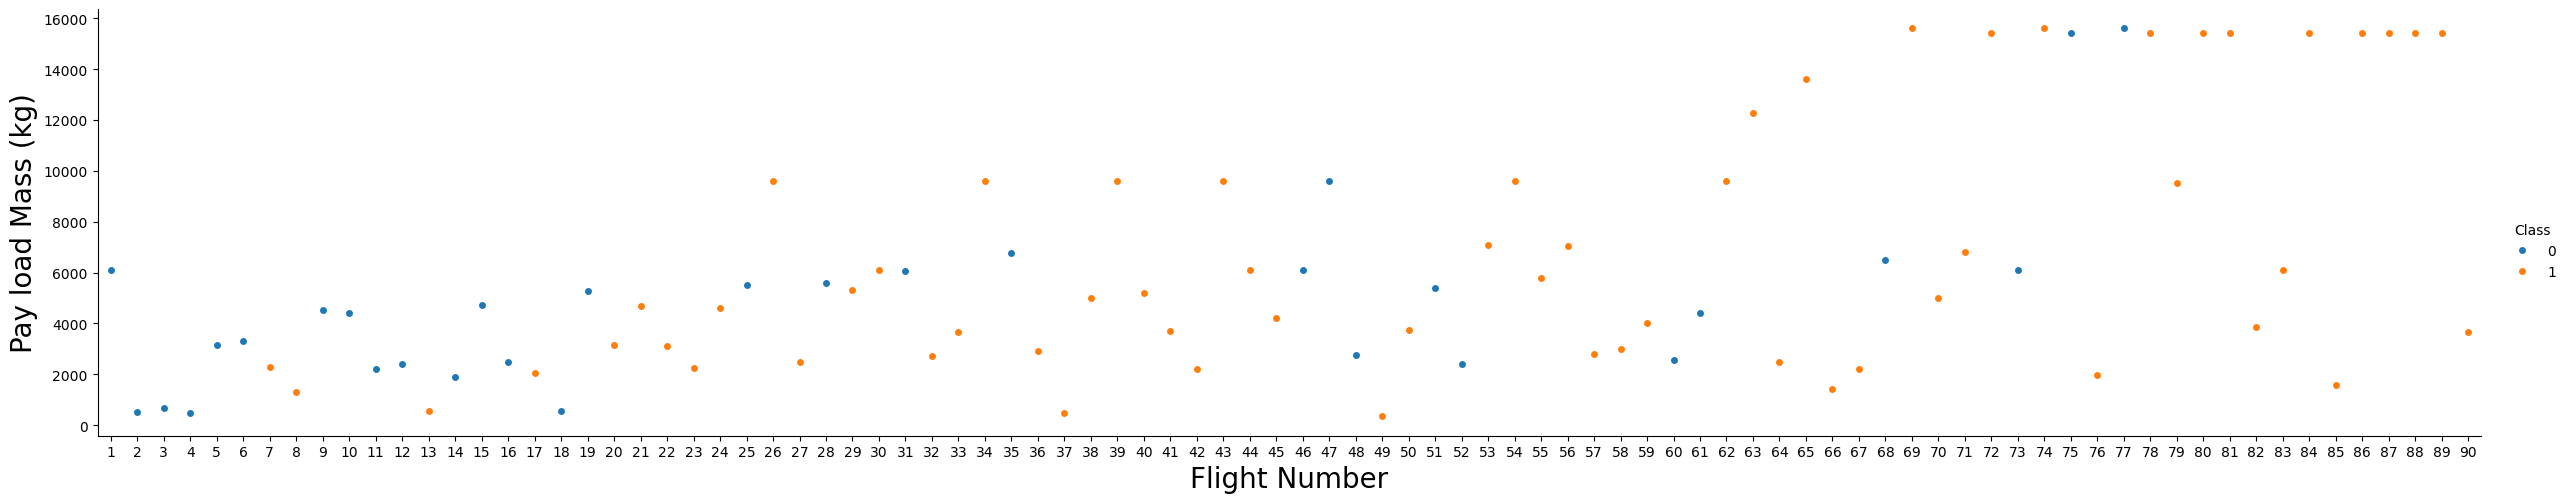

In [6]:
sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [7]:
df[['LaunchSite','Class']].groupby(['LaunchSite']).mean()

,Class
LaunchSite,
CCAFS SLC 40,0.600000
KSC LC 39A,0.772727
VAFB SLC 4E,0.769231


In [8]:
df.groupby(['Class']).mean()

<ipython-input-8-530416df0615>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Class']).mean()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
Class,,,,,,,,,,
0,30.733333,4784.558961,1.533333,0.400000,0.266667,0.400000,2.566667,0.533333,-84.585144,29.176581
1,52.883333,6765.159637,1.916667,0.966667,0.483333,0.983333,3.966667,2.216667,-87.257144,29.586653


Next, let's drill down to each site visualize its detailed launch records.


In [9]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


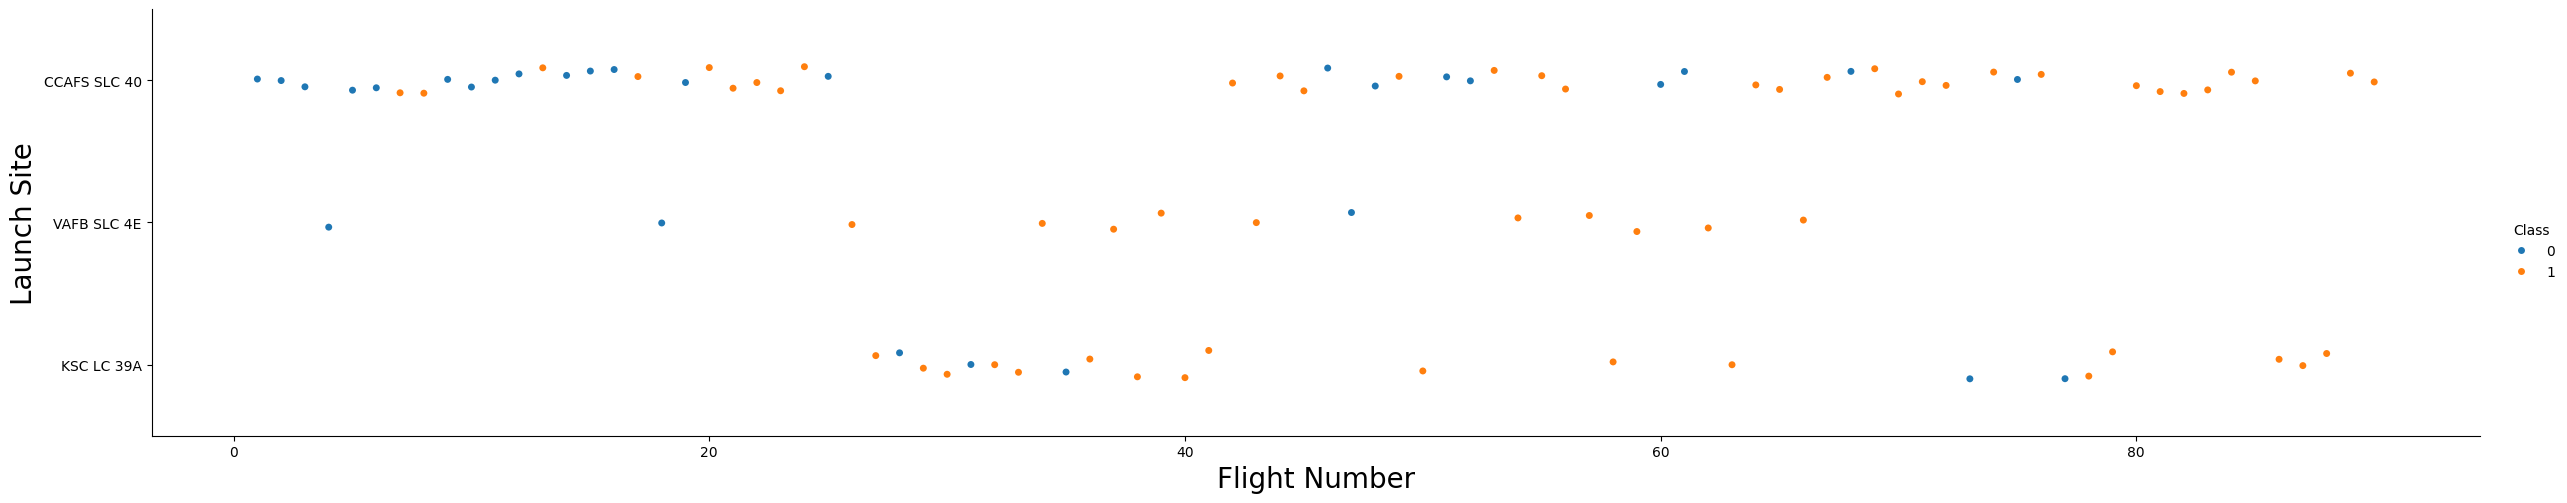

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x="FlightNumber",y="LaunchSite",hue="Class",data=df,aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [11]:
#### MY ANSWER: An increasing number of conducted flights, increase the likelihood of success

In [12]:
### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


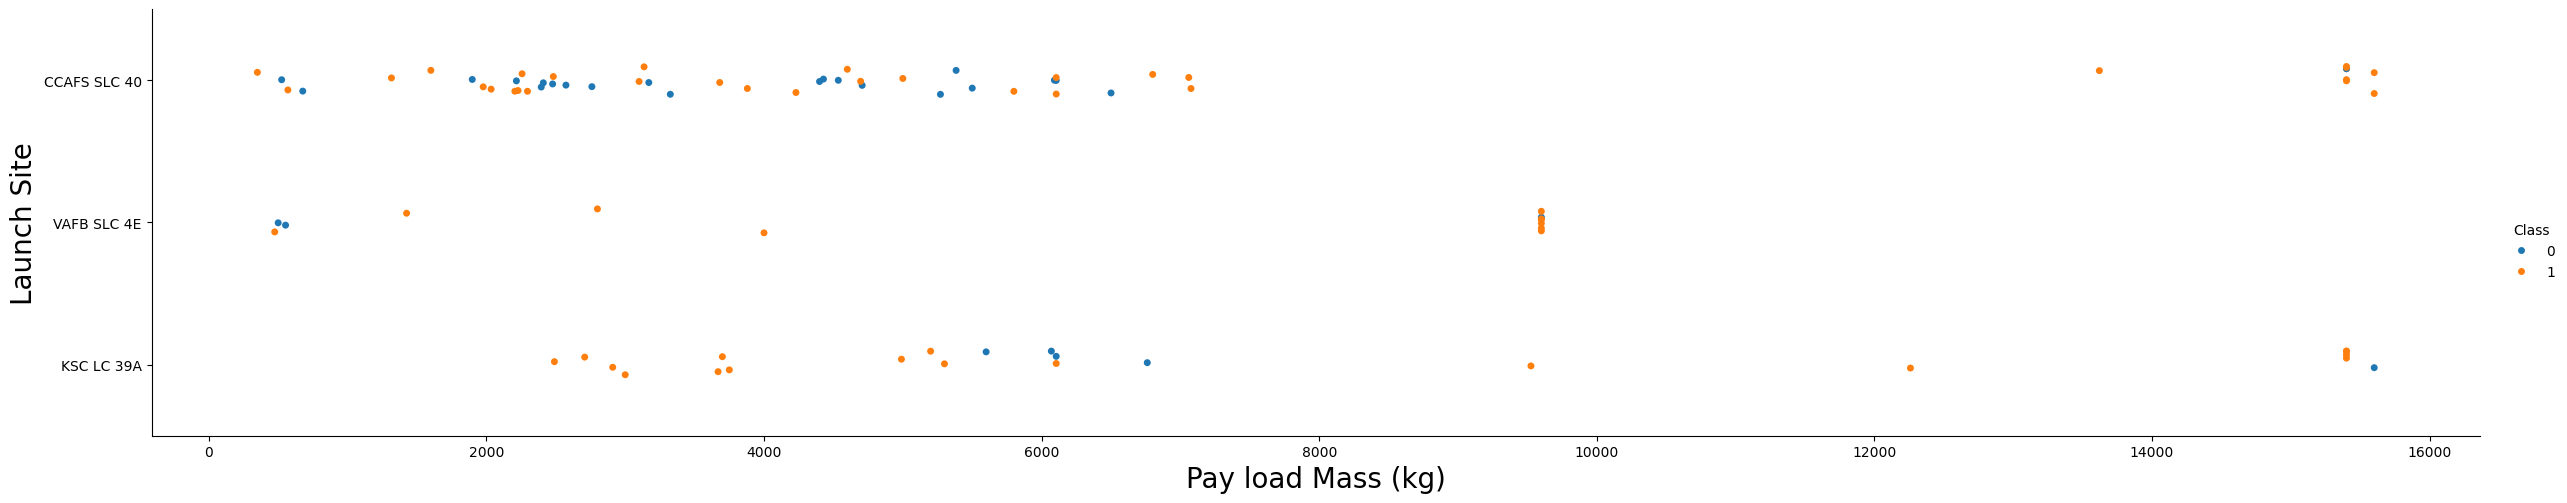

In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass",y="LaunchSite",hue="Class",data=df,aspect=5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [14]:
### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [15]:
# HINT use groupby method on Orbit column and get the mean of Class column

In [16]:
df_task_3 = df[['Orbit','Class']].groupby('Orbit').mean().sort_values(by="Class",ascending=False)
df_task_3

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
HEO,1.000000
SSO,1.000000
VLEO,0.857143
LEO,0.714286
MEO,0.666667
PO,0.666667
ISS,0.619048


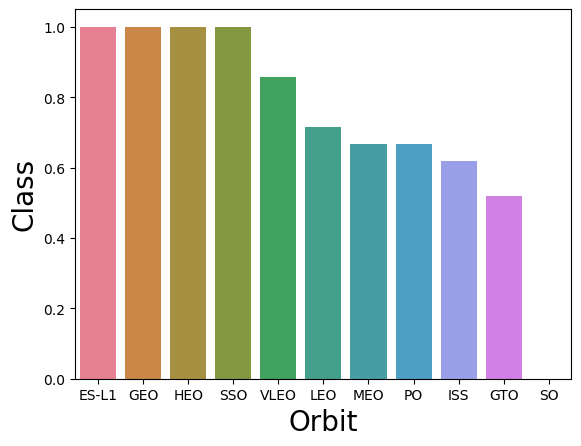

In [17]:
sns.barplot(x="Orbit",y="Class",hue="Orbit",data=df_task_3)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Class",fontsize=20)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [18]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [19]:
df_task_4 = df[['Orbit','FlightNumber']].groupby('Orbit').sum().sort_values(by="FlightNumber",ascending=False)
df_task_4

,FlightNumber
Orbit,
VLEO,1105
GTO,946
ISS,822
PO,327
SSO,304
MEO,233
LEO,140
GEO,83
SO,73


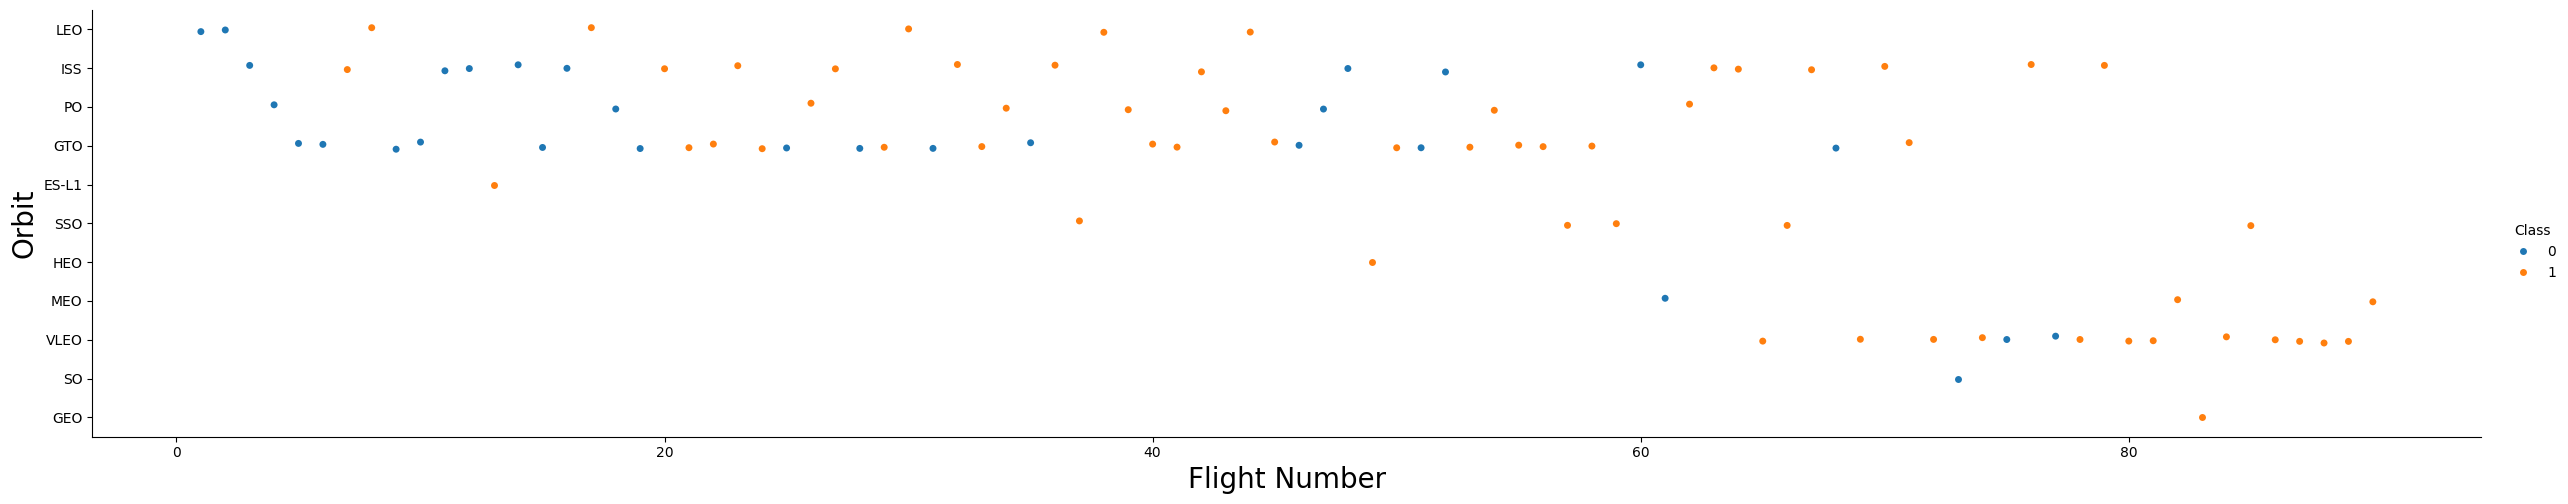

In [20]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="FlightNumber",y="Orbit",hue="Class",data=df,aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [21]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


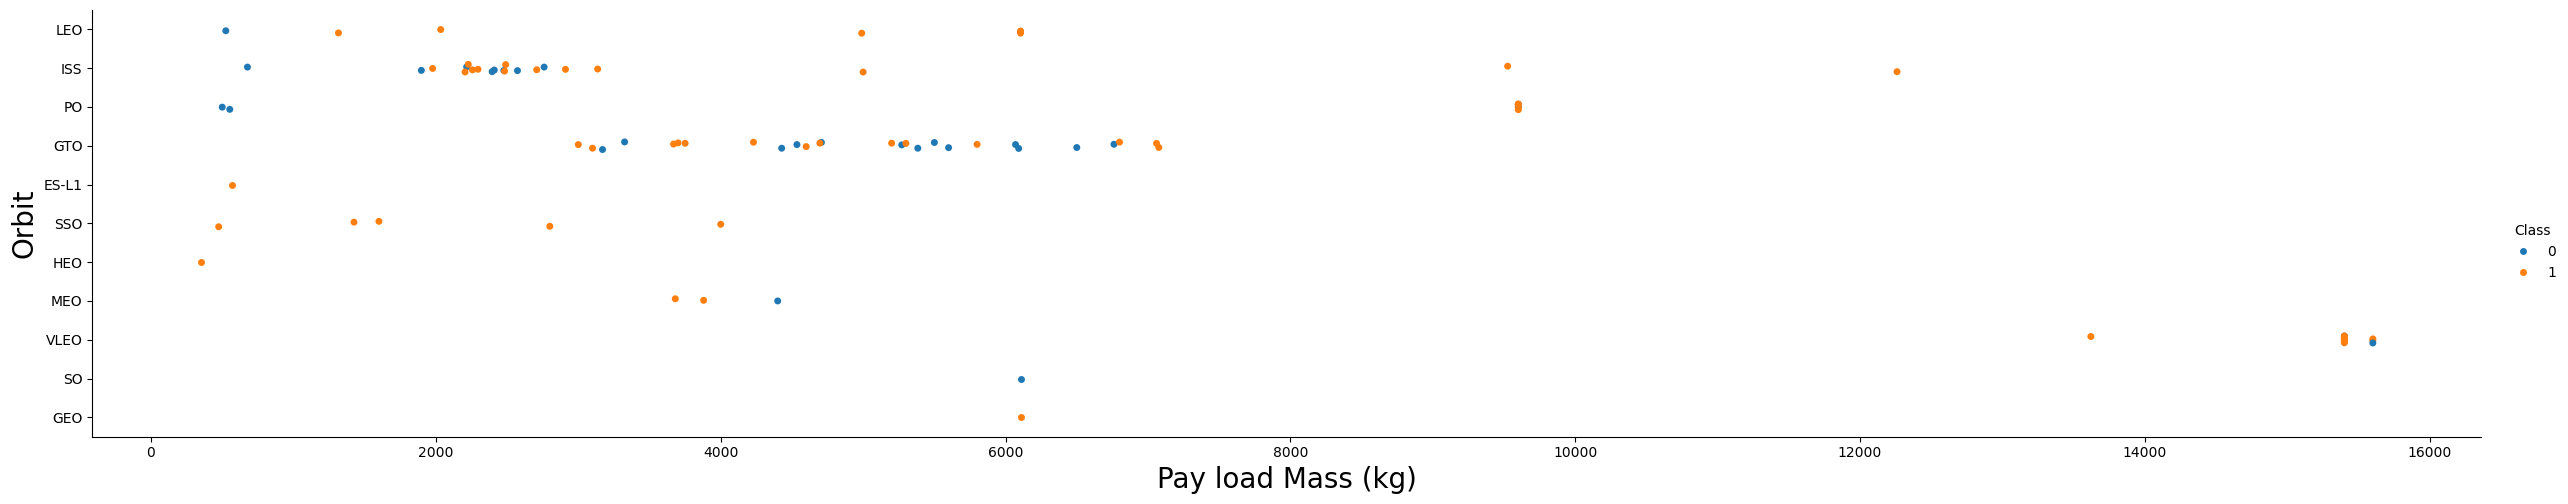

In [22]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass",y="Orbit",hue="Class",data=df,aspect=5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [23]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [24]:
df['Date'][0]

'2010-06-04'

In [25]:
df[['Date']].iloc[:1]

,Date
0,2010-06-04


In [26]:
print("2010-06-04".split("-")[0])
print("2010-06-04".split("-")[1])
print("2010-06-04".split("-")[2])

2010
06
04


In [27]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [28]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

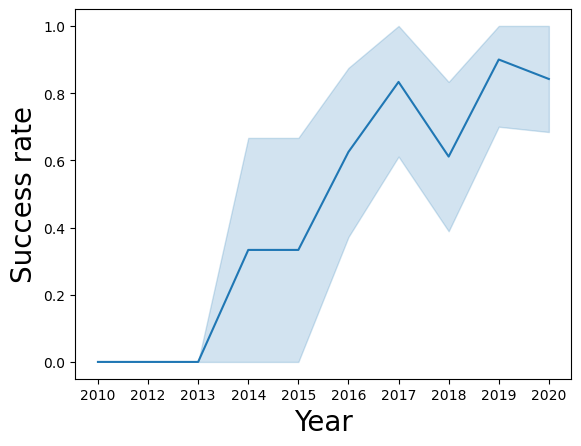

In [29]:
sns.lineplot(x="Date",y="Class",data=df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [30]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [31]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [32]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [33]:
# HINT: Use get_dummies() function on the categorical columns

In [34]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [35]:
len(df.columns)

18

In [36]:
len(features.columns)

12

In [37]:
features_one_hot = pd.get_dummies(features[['Orbit','LaunchSite','LandingPad','Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# THIS IS THE CORRECT OUTPUT WHICH WHAT IS ASKED FOR
features_one_hot_2 = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'], dtype=float)
features_one_hot_2.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,525.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,677.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,500.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3170.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
len(features_one_hot_2.columns)

80

In [38]:
len(features_one_hot.columns)

72

In [39]:
len(df.columns) + len(features_one_hot.columns)

90

In [40]:
len(features.columns) + len(features_one_hot.columns)

84

In [41]:
features_combined = pd.concat([features,features_one_hot],axis=1)
features_combined.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
features_combined.corr()

<ipython-input-42-56438eabbe1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features_combined.corr()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,-0.132606,1.530070e-01,...,0.155653,0.250330,0.059163,0.264202,0.063243,0.197160,0.268045,0.269798,0.287106,0.181568
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,-0.125673,-3.944528e-17,...,0.221510,0.380222,-0.080194,0.307128,-0.038712,0.028755,0.168585,-0.005114,0.216980,-0.055037
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,-0.069315,1.854898e-02,...,0.216505,0.379069,-0.069315,0.283688,-0.069315,0.127122,0.032495,0.127122,0.032495,-0.069315
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,0.056659,5.665927e-02,...,0.115278,0.142857,0.056659,0.129641,-0.198307,0.115278,0.099258,0.115278,0.099258,0.056659
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.088566,1.268651e-01,...,0.148539,0.229341,-0.088566,0.191692,-0.088566,0.148539,0.096447,0.148539,0.096447,-0.088566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1056,0.197160,0.028755,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,-0.022861,-2.286050e-02,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,1.000000,-0.040048,-0.046512,-0.040048,-0.022861
Serial_B1058,0.268045,0.168585,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,-0.019684,5.708263e-01,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,1.000000,-0.040048,-0.034483,-0.019684
Serial_B1059,0.269798,-0.005114,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,-0.022861,-2.286050e-02,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,-0.046512,-0.040048,1.000000,-0.040048,-0.022861
Serial_B1060,0.287106,0.216980,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,-0.019684,-1.968367e-02,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,-0.034483,-0.040048,1.000000,-0.019684


In [75]:
features_one_hot_2.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,-0.132606,1.530070e-01,...,0.155653,0.250330,0.059163,0.264202,0.063243,0.197160,0.268045,0.269798,0.287106,0.181568
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,-0.125673,-3.944528e-17,...,0.221510,0.380222,-0.080194,0.307128,-0.038712,0.028755,0.168585,-0.005114,0.216980,-0.055037
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,-0.069315,1.854898e-02,...,0.216505,0.379069,-0.069315,0.283688,-0.069315,0.127122,0.032495,0.127122,0.032495,-0.069315
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,0.056659,5.665927e-02,...,0.115278,0.142857,0.056659,0.129641,-0.198307,0.115278,0.099258,0.115278,0.099258,0.056659
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.088566,1.268651e-01,...,0.148539,0.229341,-0.088566,0.191692,-0.088566,0.148539,0.096447,0.148539,0.096447,-0.088566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1056,0.197160,0.028755,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,-0.022861,-2.286050e-02,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,1.000000,-0.040048,-0.046512,-0.040048,-0.022861
Serial_B1058,0.268045,0.168585,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,-0.019684,5.708263e-01,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,1.000000,-0.040048,-0.034483,-0.019684
Serial_B1059,0.269798,-0.005114,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,-0.022861,-2.286050e-02,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,-0.046512,-0.040048,1.000000,-0.040048,-0.022861
Serial_B1060,0.287106,0.216980,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,-0.019684,-1.968367e-02,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,-0.034483,-0.040048,1.000000,-0.019684


In [43]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [44]:
# HINT: use astype function

In [77]:
# casted float in the get_dummies() function already
features_one_hot_2.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [45]:
features_one_hot.dtypes

Orbit_ES-L1     uint8
Orbit_GEO       uint8
Orbit_GTO       uint8
Orbit_HEO       uint8
Orbit_ISS       uint8
                ...  
Serial_B1056    uint8
Serial_B1058    uint8
Serial_B1059    uint8
Serial_B1060    uint8
Serial_B1062    uint8
Length: 72, dtype: object

In [46]:
features_one_hot = features_one_hot.astype(np.float64)

In [47]:
features_one_hot.dtypes

Orbit_ES-L1     float64
Orbit_GEO       float64
Orbit_GTO       float64
Orbit_HEO       float64
Orbit_ISS       float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 72, dtype: object

In [48]:
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
type(features_one_hot.columns)

pandas.core.indexes.base.Index

In [50]:
print(features_one_hot.columns)

Index(['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029',
       'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034'

In [51]:
features_one_hot.columns = features_one_hot.columns.map(str)

In [52]:
type(features_one_hot.columns)

pandas.core.indexes.base.Index

In [53]:
print(features_one_hot.columns)

Index(['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029',
       'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034'

In [54]:
features_one_hot.loc[:,'Orbit_GTO']

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
     ... 
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
Name: Orbit_GTO, Length: 90, dtype: float64

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [78]:
features_one_hot_2.to_csv('dataset_part_3.csv', index=False)

In [56]:
df_combined = pd.concat([df,features_one_hot])

In [57]:
df_combined.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_combined.corr()

<ipython-input-58-e8695d71ca22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_combined.corr()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
FlightNumber,1.000000,0.596307,0.652842,0.932411,0.735193,0.055256,-0.054194,0.401923,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PayloadMass,0.596307,1.000000,0.665218,0.518165,0.612327,0.016181,-0.014655,0.199992,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flights,0.652842,0.665218,1.000000,0.519603,0.684802,0.085228,-0.084547,0.149787,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,0.932411,0.518165,0.519603,1.000000,0.743340,-0.030037,0.031621,0.416015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReusedCount,0.735193,0.612327,0.684802,0.743340,1.000000,-0.101877,0.102668,0.466584,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022861,-0.022861,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,1.000000,-0.040048,-0.046512,-0.040048,-0.022861
Serial_B1058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.019684,0.570826,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,1.000000,-0.040048,-0.034483,-0.019684
Serial_B1059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022861,-0.022861,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,-0.046512,-0.040048,1.000000,-0.040048,-0.022861
Serial_B1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.019684,-0.019684,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,-0.034483,-0.040048,1.000000,-0.019684


In [59]:
# Create a small dataframe from a list of lists
df_test = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                  columns=['a', 'b', 'c'],
                  index=['x', 'y', 'z'])

df_test

,a,b,c
x,1,2,3
y,4,5,6
z,7,8,9


In [60]:
# Save the dataframe as a CSV file
df.to_csv('small_df.csv')

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
